In [1]:
#!/usr/bin/env python
import sys
sys.path.insert(0, './gym-snake/')
import gym
import time
from optparse import OptionParser
import gym_snake
from gym_snake.envs.constants import GridType, Action4, Action6
from PyQt5.QtCore import Qt

from gym import wrappers
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image
import os

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

from snake_util import ReplayMemory, SnakeUtil, Transition

__author__ = "Malthe Faurschou Tøttrup"
__email__ = "malthe@toettrup.dk"

# Load the gym environment
env = gym.make('Snake-8x8-v0')

env.reset() # Reset the environment

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion() # Turn on interactive mode

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
display.clear_output()

In [2]:
class NET(nn.Module):    
    def __init__(self, outputs):
        super(NET, self).__init__()
        self.outputs = outputs
        self.sequential = nn.Sequential(
            nn.Flatten(),
            nn.Linear(768, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            # nn.Linear(1024, 1024),
            # nn.ReLU(),
            # nn.Linear(1024, 1024),
            # nn.ReLU(),
            # nn.Linear(1024, 1024),
            # nn.ReLU(),
            nn.Linear(1024, self.outputs),
        )
    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = x.to(device)
        x = self.sequential(x)
        return x


""" Hyperparameters """
NAME = "CNN_TEST"
BATCH_SIZE = 128
GAMMA = 0.95

exploration_rate = 1.
exploration_decay = 0.999
exploration_min = 0.1

TARGET_UPDATE = 1000
learning_rate = 1e-4  
decay_rate = 0.99 
num_episodes = 10000
MEMORY_SIZE = 10000

In [3]:
""" Initialize policy net and target net """
policy_net = NET(env.action_space.n).to(device)
target_net = NET(env.action_space.n).to(device)

target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

""" Initialize Utility functions"""
snakeUtil = SnakeUtil(NAME, env,policy_net, target_net ,device, exploration_rate, exploration_decay, exploration_min, MEMORY_SIZE, TARGET_UPDATE, BATCH_SIZE, GAMMA)

In [4]:
from torchsummary import summary
summary(policy_net, (3, 16, 16))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 3]                   --
|    └─Flatten: 2-1                      [-1, 768]                 --
|    └─Linear: 2-2                       [-1, 1024]                787,456
|    └─ReLU: 2-3                         [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 1024]                1,049,600
|    └─ReLU: 2-5                         [-1, 1024]                --
|    └─Linear: 2-6                       [-1, 3]                   3,075
Total params: 1,840,131
Trainable params: 1,840,131
Non-trainable params: 0
Total mult-adds (M): 3.68
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 7.02
Estimated Total Size (MB): 7.04


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 3]                   --
|    └─Flatten: 2-1                      [-1, 768]                 --
|    └─Linear: 2-2                       [-1, 1024]                787,456
|    └─ReLU: 2-3                         [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 1024]                1,049,600
|    └─ReLU: 2-5                         [-1, 1024]                --
|    └─Linear: 2-6                       [-1, 3]                   3,075
Total params: 1,840,131
Trainable params: 1,840,131
Non-trainable params: 0
Total mult-adds (M): 3.68
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 7.02
Estimated Total Size (MB): 7.04

Playing episode: 100/10000 	Mean loss => 0.0007 	Mean reward => -0.96
Playing episode: 200/10000 	Mean loss => 0.0038 	Mean reward => -0.93
episode 200
1020
200


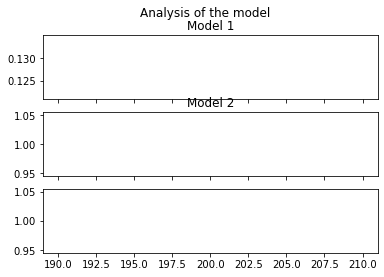

KeyboardInterrupt: 

In [5]:
snakeUtil.train()

In [ ]:
print('Complete')
env.close()
plt.plot(rewards)
plt.plot(moving_average_reward)
plt.ioff()
plt.show()

In [ ]:
plt.plot(mean_loss)
plt.plot(mean_loss[-len(mean_loss)+1000:])

In [ ]:
""" Record 10 videos """
snakeUtil.record_episodes()